# Linear Regrssion

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import resample

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd
import numpy as np

In [19]:
np.random.seed(0)

In [20]:
df1 = pd.read_csv("test.csv")
df2 = pd.read_csv("train.csv")

In [21]:
df = pd.concat([df1,df2])
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,...,3,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False
1,2,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,...,1,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False
2,3,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,...,1,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False
3,4,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,...,3,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False
4,5,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,...,1,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False


# Encoding

In [22]:
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

df['make_encoded'] = label_encoder.fit_transform(df['make'])
df['fuel_type_encoded'] = label_encoder.fit_transform(df['fuel_type'])
df['body_type_encoded'] = label_encoder.fit_transform(df['body_type'])
df['transmission_encoded'] = label_encoder.fit_transform(df['transmission'])

ordinal_categories = ['great', 'good', 'fair', 'overpriced']

df['car_rating_encoded'] = ordinal_encoder.fit_transform(df[['car_rating']])


df.drop(columns=['make'], inplace=True)
df.drop(columns=['model'], inplace=True)
df.drop(columns=['rto'], inplace=True)
df.drop(columns=['fuel_type'], inplace=True)
df.drop(columns=['body_type'], inplace=True)
df.drop(columns=['car_rating'], inplace=True)
df.drop(columns=['city'], inplace=True)
df.drop(columns=['registered_city'], inplace=True)
df.drop(columns=['registered_state'], inplace=True)
df.drop(columns=['car_name'], inplace=True)
df.drop(columns=['variant'], inplace=True)
df.drop(columns=['source'], inplace=True)
df.drop(columns=['car_availability'], inplace=True)
df.drop(columns=['ad_created_on'], inplace=True)
df.drop(columns=['transmission'], inplace=True)
df.drop(columns=['is_hot'], inplace=True)
df.drop(columns=['emi_starts_from'], inplace=True)
df.drop(columns=['broker_quote'], inplace=True)



In [23]:
df = df.dropna(axis=0)  # Remove rows with NaNs
len(df)

4120

In [24]:
df

id  yr_mfr  kms_run  sale_price  times_viewed  assured_buy  is_hot  \
0        1    2012    69029      364299          2068         True    True   
4        5    2017    53648     1082011          2927         True    True   
6        7    2010    59295      286399           506         True    True   
7        8    2014    50294      283299          1281         True    True   
9       10    2013   116848      205299          1069         True    True   
...    ...     ...      ...         ...           ...          ...     ...   
6382  6383    2016    41739      537999          2610         True    True   
6384  6385    2016    62899      528199          1826         True    True   
6385  6386    2019    55048      380799          1657         True    True   
6386  6387    2018    43035      315899          2559         True    True   
6387  6388    2015   148250      531399          3680         True    True   

      total_owners  original_price fitness_certificate  booking_down_pymnt  \
0                3        365029.0                True               54645   
4                1       1125840.0                True              162302   
6                2        286499.0                True               42960   
7                1        349654.0                True               42495   
9                1        263694.0                True               30795   
...            ...             ...                 ...                 ...   
6382             1        673053.0                True               80700   
6384             1        639270.0                True               79230   
6385             1        454738.0                True               57120   
6386             1        358430.0                True               47385   
6387             2        633876.0                True               79710   

      reserved  warranty_avail  make_encoded  fuel_type_encoded  \
0        False           False            14                  2   
4        False           False             7                  0   
6        False           False             7                  2   
7        False           False            14                  2   
9        False           False            14                  2   
...        ...             ...           ...                ...   
6382      True           False            14                  0   
6384      True           False            14                  0   
6385      True           False            14                  2   
6386      True           False            20                  2   
6387      True           False             7                  0   

      body_type_encoded  transmission_encoded  car_rating_encoded  
0                     3                     1                 2.0  
4                     4                     0                 2.0  
6                     0                     1                 1.0  
7                     0                     1                 2.0  
9                     0                     1                 2.0  
...                 ...                   ...                 ...  
6382                  3                     1                 2.0  
6384                  3                     2                 2.0  
6385                  0                     1                 2.0  
6386                  0                     1                 1.0  
6387                  3                     1                 2.0  

[4120 rows x 17 columns]

In [25]:
y = df["sale_price"]
df.drop(columns=['sale_price'], inplace=True)
X = df

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.25)

In [26]:
from sklearn.utils import resample
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = linear_regressor.predict(X_bs)
    # evaluate model
    score = mean_absolute_error(y_bs, y_hat)
    accuracy.append(score)

In [27]:
y_pred=linear_regressor.predict(X_test)

# Model Evaluation (Metrics)

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.22234341570319444

In [29]:
mse = mean_squared_error(y_test, y_pred)
mse

0.2590934710519992

In [30]:
r2 = r2_score(y_test, y_pred)
r2

0.9999999999968283

# Graphs (Expected Value vs Actual Data)

In [31]:
import matplotlib.pyplot as plt

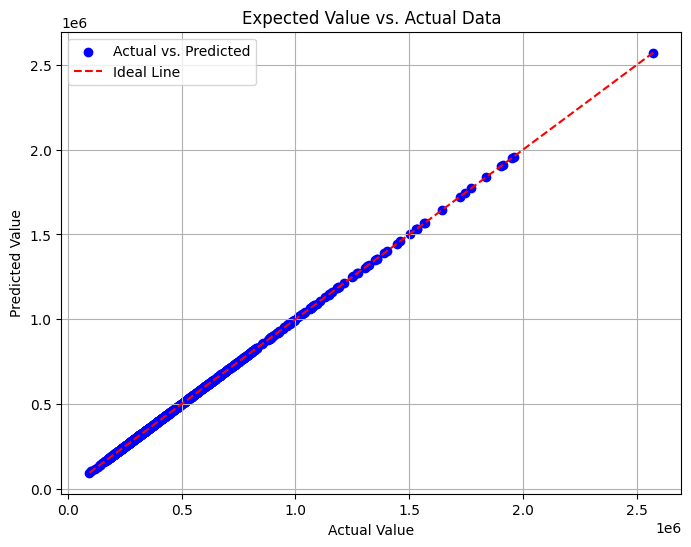

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Expected Value vs. Actual Data')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.grid(True)
plt.show()

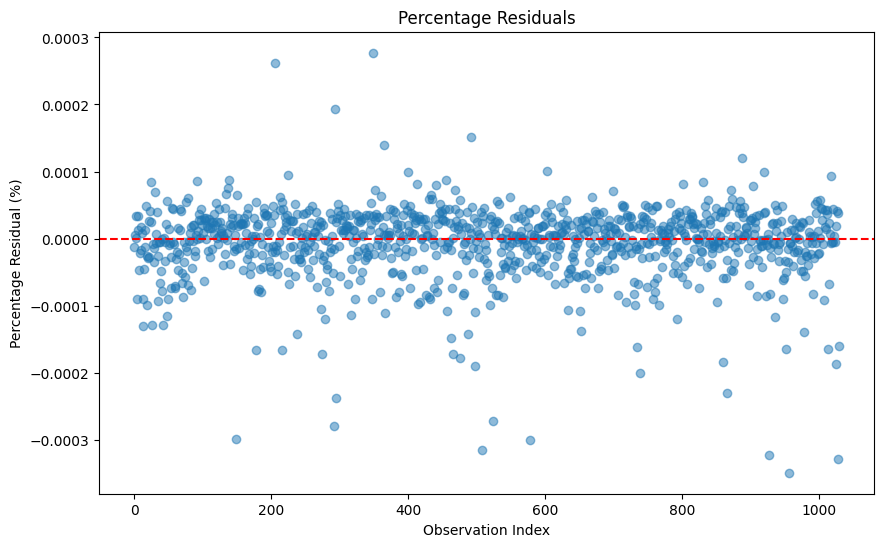

In [33]:
# Calculate percentage residuals: (Actual - Predicted) / Actual * 100
percentage_residuals = ((y_test - y_pred) / y_test) * 100

# Plotting percentage residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(percentage_residuals)), percentage_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Percentage Residuals')
plt.xlabel('Observation Index')
plt.ylabel('Percentage Residual (%)')
plt.show()